# DATA ANALYSIS OF GOOGLE APP'S RATINGS

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1. Import Python Libraries
            </span>   
        </font>    
</h3>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import style 
style.use("ggplot")



<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2. Reading and Understanding the Data
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            2.1 Importing the Input files   
            </span>   
        </font>    
</h4>


In [16]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [17]:
google_df = pd.read_csv(r'/kaggle/input/google-play-store-apps/googleplaystore.csv')

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Inspecting Data Frames
            </span>   
        </font>    
</h3>

In [18]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
# Database Dimension
google_df.shape

(10841, 13)

In [20]:
# Database Datatype, Null-Values and Dimention
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [21]:
# Checking the numeric variables of the dataframes

google_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3. Data Cleaning
            </span>   
        </font>    
</h3>


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            3.1 Finding and dropping duplicated Values and Columns
            </span>   
        </font>    
</h4>

In [22]:
#google_df.shape

In [23]:
# To find the Number of unique vlaues in each Column
#google_df['App'].count()

In [24]:
# Number of duplicated Values in the column 'App'
#google_df.duplicated(subset='App').sum()
#dups = google_df.pivot_table(index = ['App'], aggfunc ='size').reset_index(name='count')
#dups['count'].sample(20)

In [25]:
# Dropping all the duplicated values in the 'App' column
#google_df.drop_duplicates(subset='App', keep='first', inplace=True)

In [26]:
#google_df.duplicated(subset='App').sum()

In [27]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
google_df.shape

(10841, 13)

In [30]:
# The column Category and Genres have the same Data Values
google_df.drop(['Genres'], axis =1,inplace=True)

In [31]:
google_df.shape

(10841, 12)

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            3.2 Finding and Removing Outliers
            </span>   
        </font>    
</h4>

<AxesSubplot:>

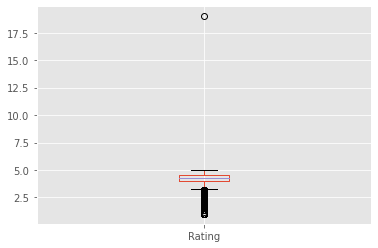

In [32]:
google_df.boxplot()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The above graph shows that there is an outlier at approximately 19 which needs to be removed, since the range of the column, Rating has to be from 1-5.
    </span>    
</div>

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

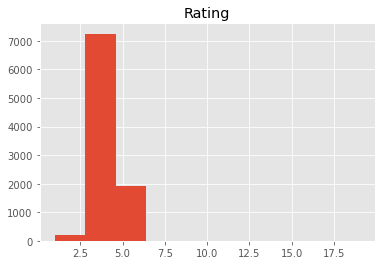

In [33]:
google_df.hist()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The above graph is skewed which confirms the presence of outliers in the Rating column.
    </span>    
</div>

In [34]:
google_df[google_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up,NaN


In [35]:
google_df.drop([10472],inplace=True)


In [36]:
google_df[google_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver


<AxesSubplot:>

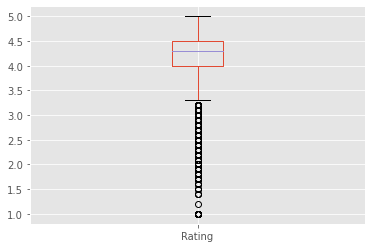

In [37]:
google_df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

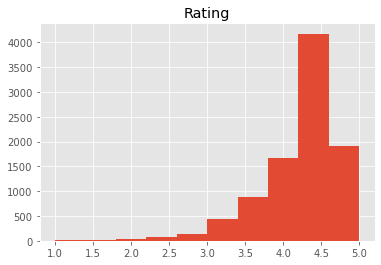

In [38]:
google_df.hist()

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4. Data Imputation
            </span>   
        </font>    
</h3>



<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.1. Null Value Calculation
            </span>   
        </font>    
</h4>


In [39]:
google_df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2 Fill the Missing Values
            </span>   
        </font>    
</h4>


In [40]:
#we chose median because the graph was skewed so median >>> mean
google_df['Rating'].fillna((google_df['Rating'].median()), inplace=True)


In [41]:
#finding the mode 
print(google_df['Type'].mode())
print(google_df['Current Ver'].mode())
print(google_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [42]:
# fill w mode values
google_df['Type'].fillna(str(google_df['Type'].mode()[0]), inplace=True)
google_df['Current Ver'].fillna(str(google_df['Current Ver'].mode()[0]), inplace=True)
google_df['Android Ver'].fillna(str(google_df['Android Ver'].mode()[0]), inplace=True)



In [43]:
google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5. Data Transformation
            </span>   
        </font>    
</h3>


In [44]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


insight ^^

In [45]:
# object ---> int
google_df['Price'] = google_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_df['Price'] = pd.to_numeric(google_df['Price'])

In [46]:
google_df['Installs']= google_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
google_df['Installs'] = google_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
google_df['Installs'] = pd.to_numeric(google_df['Installs'])

In [47]:
google_df.info() #to check if changes are made or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.1+ MB


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            6. Data Analysis and Visualisation 
            </span>   
        </font>    
</h3>


In [48]:
cat_grp = google_df.groupby('Category')
x = cat_grp['Rating'].agg(np.mean)
y = cat_grp['Price'].agg(np.sum)
z = cat_grp['Installs'].count()


In [49]:
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            6.1 Category vs Rating
            </span>   
        </font>    
</h4>


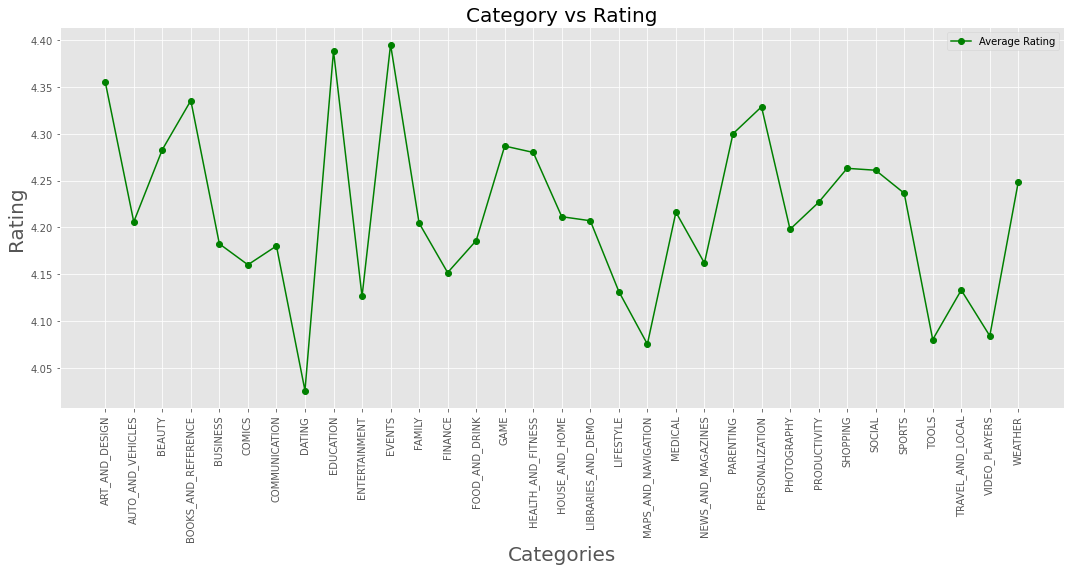

In [50]:
plt.figure(figsize=(18,7))
plt.plot(x,'-o', color='g',label='Average Rating')
plt.xticks(rotation=90)
plt.title('Category vs Rating',fontdict={'fontsize':20})
plt.xlabel('Categories',fontdict={'fontsize':20})
plt.ylabel('Rating',fontdict={'fontsize':20})
plt.legend()
plt.show()


insights^^^^


<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            6.2 Category vs Pricing
            </span>   
        </font>    
</h4>

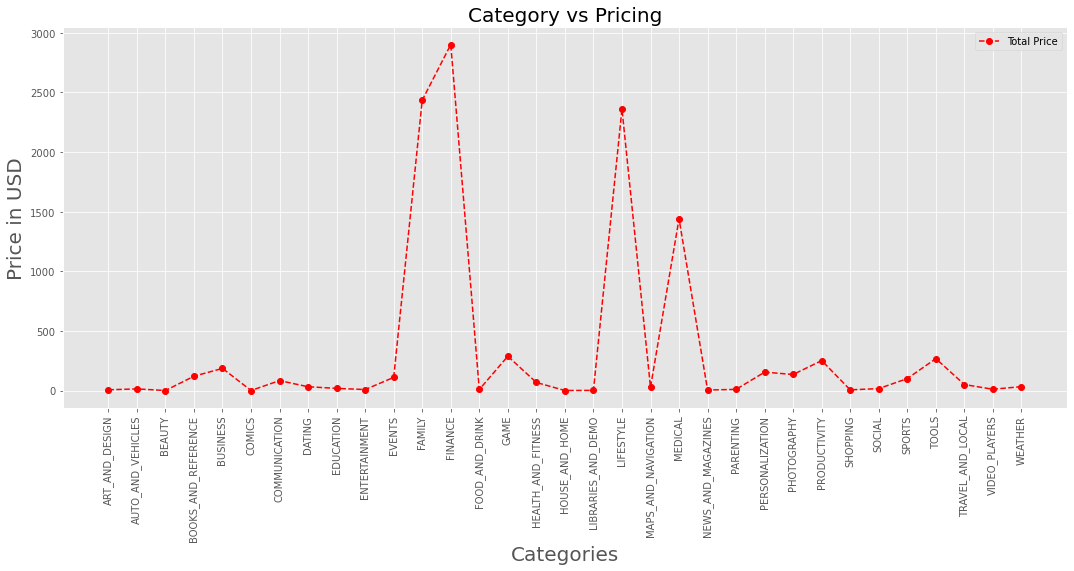

In [51]:
plt.figure(figsize=(18,7))
plt.plot(y,'r--o', color='r',label='Total Price')
plt.xticks(rotation=90)
plt.title('Category vs Pricing',fontdict={'fontsize':20})
plt.xlabel('Categories',fontdict={'fontsize':20})
plt.ylabel('Price in USD',fontdict={'fontsize':20})
plt.legend()
plt.show()


Insights^^^

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            6.3 Category vs Number of Installs
            </span>   
        </font>    
</h4>

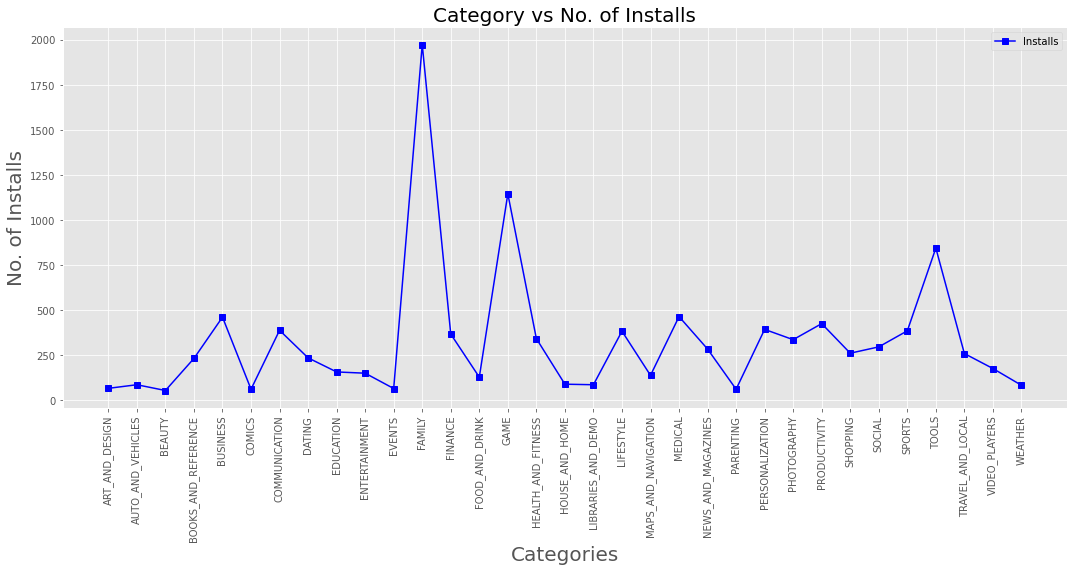

In [52]:
plt.figure(figsize=(18,7))
plt.plot(z,'-bs', color='b',label='Installs')
plt.xticks(rotation=90)
plt.title('Category vs No. of Installs',fontdict={'fontsize':20})
plt.xlabel('Categories',fontdict={'fontsize':20})
plt.ylabel('No. of Installs',fontdict={'fontsize':20})
plt.legend()
plt.show()

Insights^^^